# SymPy Overview Presentation

By Andrew Bahsoun & Max Richter

Assignment Completed: 02/19/24   
Presentation: 05/02/24

## Introduction to SymPy

`sympy` stand for "Symbolic Python" and is a powerful module for performing analytic mathematical calculations without the constraints of usual numeric types. By convention, its name is shortened to `sp` when imported.

In this presentation, we will talk about some of the things that SymPy allows us to do that regular python cant do. Then we will compare SymPy to NumPy, another Python Libary. Finally, we will show some example exercises.

## Symbols and Expressions

The simplest use for `sympy` is to manipulate "expressions" containing algebraic variables. You need to declare which text symbols should be treated as mathematical symbols as follows:

In [2]:
x, y, z, t = sp.symbols("x, y, z, t")

In [ ]:
type(x)

sympy.core.symbol.Symbol

In [8]:
e1 = x + 1

In [9]:
type(e1)

sympy.core.add.Add

In [10]:
e1

x + 1

You can use these expressions to make sure you have done your work correctly as well. 

In [11]:
sp.simplify(e1 - (x +1) == 0)

True

To substitute values into an algebraic expression, use the method `.subs` of that expression:

In [19]:
sp.simplify(e1.subs(x, 2))

3

To evaluate a numeric expression into floats (to do actual numerical calculations with), use the method `.evalf()`:

In [13]:
e1.subs(x, 2).evalf()

3.00000000000000

You can also substitute entire expressions into a variable, not just numbers:

In [18]:
e2 = 2*x
e2.subs(x, e1)

2*x + 2

## Numeric Precision

Unlike with numeric types, symbolic types can have infinite precision. You can see this when dealing with square roots or other operations that produce irrational numbers (that can't be stored numerically without error).

Compare the `numpy` implementation of square root or the number pi, which returns a finite precision `float`:

In [ ]:
np.sqrt(2)

1.4142135623730951

In [ ]:
np.pi

3.141592653589793

In [ ]:
np.sqrt(2)**2

2.0000000000000004

to the `sympy` implementation of square root, which retains infinite precision when possible:

In [ ]:
sp.sqrt(2)

sqrt(2)

In [ ]:
sp.pi

pi

In [ ]:
sp.sqrt(2)**2

2

## Equations

To create an equation that you wish to solve for a particular variable, use the syntax:

In [ ]:
e3 = sp.Eq(x**2, 1)
e3

Eq(x**2, 1)

You can then solve such an equation for a particular variable using `sp.solveset` or `sp.solve` or `sp.linsolve` or `sp.nonlinsolve`:

In [ ]:
sp.solveset(e3, x)

{-1, 1}

## Calculus

In addition to basic algebraic operations, `sympy` also has calculus features, like differentiation:

In [ ]:
e1

x + 1

In [ ]:
sp.diff(e1, x)

1

and integration (which without arguments is antidifferentiation assuming a zero added constant):



In [ ]:
sp.integrate(e1)

x**2/2 + x

`sympy` can also take limits of expressions:

In [ ]:
sp.limit(sp.sin(x)/x, x, 0)

1

or compute Taylor expansions:

In [ ]:
sp.exp(x).series(x, 0, 4)

1 + x + x**2/2 + x**3/6 + O(x**4)

## Plotting

Another useful feature of `sympy` is that it hooks into `matplotlib` to make plotting functions very convenient.

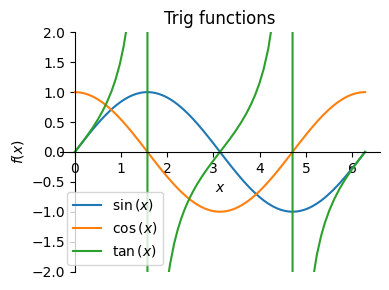

In [4]:
import sympy as sp
sp.plot(sp.sin(x), sp.cos(x), sp.tan(x), (x, 0, 2*sp.pi), title="Trig functions", legend=True, ylim=(-2, 2), size=(4, 3))

### 1. Function extrema

We can use SymPy to find the extrema of the function $g(x) = 4 x^3 + 3 x^2 - 6 x - 1$. And plot it. 

In [6]:
# create the function g(x)
x = sp.symbols('x')
gx = 4*x**3 + 3*x**2 - 6*x - 1
gx

4*x**3 + 3*x**2 - 6*x - 1

In [7]:
# take the derivative of g(x)
gxp = sp.diff(gx)
gxp
#make gxp an equation
gxp_eq = sp.Eq(gxp, 0)
gxp_eq

Eq(12*x**2 + 6*x - 6, 0)

In [8]:
#solve for x and find critical points (location of extrema)
#converts to list to be accessed later
solutions_list = list(sp.solveset(gxp_eq, x))
solutions_list

[-1, 1/2]

In [9]:
# get second derirvative of gx
gxp2 = sp.diff(gxp)
gxp2

#take value of extrema as variable
val_gxp2e = gxp2.subs(x, -1)
val_gxp2e2 = gxp2.subs(x, 1/2)

# if the value is positive, it is minima, if it is negative, it is maxima

#logic for determinding minima or maxima
print(val_gxp2e) # for -1
print(val_gxp2e2) # for 1/2

-18
18.0000000000000


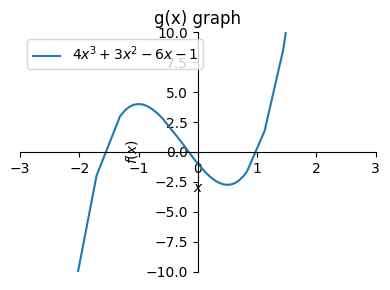

In [10]:
#plot graph using sp
sp.plot((gx), title="g(x) graph", legend=True, ylim=(-10, 10), xlim=(-3,3), size=(4, 3))
# the graph shows that there is a maximum at -1 and minima and 1/2,
# this corresponds to our information in the logic

### 2. Particle motion

The parametric equations for the motion of a charged particle released from rest in electric and magnetic fields at right angles to each other take the forms,
$$ x(\theta) = a(\theta - \sin\theta),$$
$$ y(\theta) = a(1 - \cos\theta),$$
with a real constant $a$.

Show that the line tangent to this curve at the point $(x(\theta),y(\theta))$ has the slope $\displaystyle \frac{dy}{dx}(\theta) = \frac{(dy/d\theta)(\theta)}{(dx/d\theta)(\theta)}= \cot(\theta/2)$.

Where does this slope vanish? Where does the slope diverge?

Plot the curve of the particle parametrically to see what this looks like. Explain where the points are on the curve where the slope vanishes or diverges.

In [ ]:
x = sp.symbols('x')
y = sp.symbols('y')
theta = sp.symbols('theta')
a = sp.symbols('a', constant=True)

In [ ]:
xtheta = a*(theta - sp.sin(theta))
xtheta

theta - sin(theta)

In [ ]:
ytheta = a*(1 - sp.cos(theta))
ytheta

a*(1 - cos(theta))

In [ ]:
xthetap = sp.diff(xtheta, theta)
xthetap

a*(1 - cos(theta))

In [ ]:
ythetap = sp.diff(ytheta, theta)
ythetap

a*sin(theta)

In [ ]:
exp = ythetap/xthetap
exp

sin(theta)/(1 - cos(theta))

In [ ]:
sp.trigsimp(exp)
exp

sin(theta)/(1 - cos(theta))

In [ ]:
exp2 = sp.cot(theta/2)

eq = sp.Eq(exp, exp2)
solution = sp.solve(eq)
solution

[]

solution being empty means the equality holds true

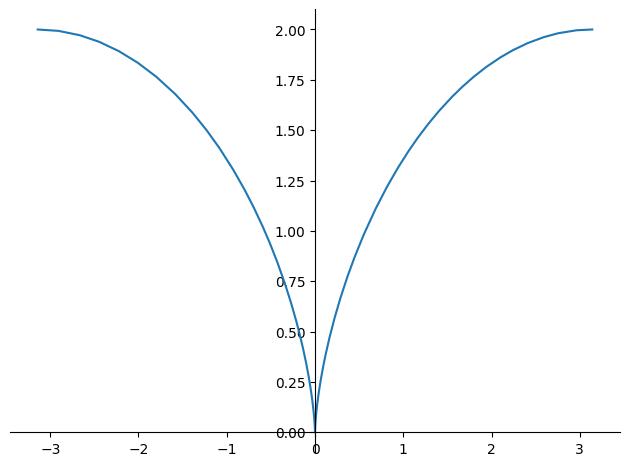

In [ ]:
xtheta_plot = (theta - sp.sin(theta))
ytheta_plot = (1 - sp.cos(theta))
sp.plot_parametric(xtheta_plot, ytheta_plot, (theta, -sp.pi, sp.pi))

## Conclusions and Takeaways

In conclusion, symbolic python is an incredibly robust tool that seamlessly integrates symbolic mathematics into the python workflow. By bridging the gap between numerical computations and symbolic expressions, symbolic python allows us to solve complex problems and show our results much more efficiently. 